<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AJCC-Comparison-in-Pancreatic-Cancer" data-toc-modified-id="AJCC-Comparison-in-Pancreatic-Cancer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AJCC Comparison in Pancreatic Cancer</a></span><ul class="toc-item"><li><span><a href="#Data-importing-&amp;-preprocessing" data-toc-modified-id="Data-importing-&amp;-preprocessing-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data importing &amp; preprocessing</a></span></li></ul></li><li><span><a href="#EDA-(Exploratory-Data-Analysis-)" data-toc-modified-id="EDA-(Exploratory-Data-Analysis-)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA (Exploratory Data Analysis )</a></span><ul class="toc-item"><li><span><a href="#스테이지-별-데이터-분포-확인" data-toc-modified-id="스테이지-별-데이터-분포-확인-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>스테이지 별 데이터 분포 확인</a></span></li></ul></li><li><span><a href="#AJCC-기준에-따른-생존-분석" data-toc-modified-id="AJCC-기준에-따른-생존-분석-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AJCC 기준에 따른 생존 분석</a></span><ul class="toc-item"><li><span><a href="#Censored-Data-로-변환" data-toc-modified-id="Censored-Data-로-변환-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Censored Data 로 변환</a></span></li><li><span><a href="#T-stage-분석" data-toc-modified-id="T-stage-분석-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>T stage 분석</a></span><ul class="toc-item"><li><span><a href="#AJCC-7-에-따른-분석" data-toc-modified-id="AJCC-7-에-따른-분석-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>AJCC 7 에 따른 분석</a></span></li><li><span><a href="#AJCC-8-에-따른-분석" data-toc-modified-id="AJCC-8-에-따른-분석-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>AJCC 8 에 따른 분석</a></span></li></ul></li><li><span><a href="#N-stage-분석" data-toc-modified-id="N-stage-분석-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>N stage 분석</a></span><ul class="toc-item"><li><span><a href="#AJCC-7-에-따른-분석" data-toc-modified-id="AJCC-7-에-따른-분석-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>AJCC 7 에 따른 분석</a></span></li><li><span><a href="#AJCC-8-에-따른-분석" data-toc-modified-id="AJCC-8-에-따른-분석-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>AJCC 8 에 따른 분석</a></span></li></ul></li><li><span><a href="#전체-Stage-분석" data-toc-modified-id="전체-Stage-분석-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>전체 Stage 분석</a></span><ul class="toc-item"><li><span><a href="#AJCC-7-에-따른-분석" data-toc-modified-id="AJCC-7-에-따른-분석-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>AJCC 7 에 따른 분석</a></span></li><li><span><a href="#AJCC-8-에-따른-분석" data-toc-modified-id="AJCC-8-에-따른-분석-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>AJCC 8 에 따른 분석</a></span></li></ul></li></ul></li><li><span><a href="#Site-별-생존-분석" data-toc-modified-id="Site-별-생존-분석-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Site 별 생존 분석</a></span></li></ul></div>

# AJCC Comparison in Pancreatic Cancer 

## Data importing & preprocessing

In [1]:
# 데이터 불러오기
library(openxlsx)
raw_data <- read.xlsx("../AJCCdata_20180310.xlsx", sheet = 1, startRow = 2)
head(raw_data)

ID,Name,Sex,Age,Operation.date,Operation,Add_operation,R.status,Operator,Site,⋯,Recur.site.(final),최종recur.type,pre-op..CT.finding,노출,SMV.abutting,posterior,SMA.abutting,X54,X55,X56
NA,NA,NA,NA,NA,1. PPPD 2. Whipple 3. DP 4. STP 5. total P 6. central P 7. Others,NA,0. R0 1. R1 2. R2,1. 김선회 2. 장진영 3. 강미주 4. 권우일 5. 기타,"0. Uncinate 1. Head 2. body 3. tail 4. H, U 5. H, U, B, T 6. B, T 7. H, B 8. H, B, T 9. H, U, B",⋯,NA,NA,0. uncinate 1. head 2. neck 3. body 4. tail (미주 선생님 기준 상 위치),0. 노출 없 1. 노출 있,NA,NA,NA,NA,NA,NA
34564639,정영자,F,63,2005-12-16,1,NA,0,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
34540789,기원서,M,57,2005-12-20,1,NA,1,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
17420873,정정모,M,64,2005-12-21,1,NA,2,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
34590847,송법용,M,62,2005-12-23,1,NA,0,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
34604380,김주연,M,53,2006-01-04,2,NA,1,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [2]:
index = 1:length(colnames(raw_data))
as.data.frame(index, colnames(raw_data))

,index
ID,1
Name,2
Sex,3
Age,4
Operation.date,5
Operation,6
Add_operation,7
R.status,8
Operator,9
Site,10


In [3]:
library(dplyr)
df <- raw_data[c(1,3,4,10,19:26,29,37)]
head(df)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ID,Sex,Age,Site,T,N,M,Stage,T.1,N.1,M.1,Stage.1,Status,OS
NA,NA,NA,"0. Uncinate 1. Head 2. body 3. tail 4. H, U 5. H, U, B, T 6. B, T 7. H, B 8. H, B, T 9. H, U, B",NA,NA,NA,1. Ia 2. Ib 3. IIA 4. IIB 5. III 6. IV,NA,NA,NA,1. Ia 2. Ib 3. IIA 4. IIB 5. III 6. IV,0. Alive 1. Death,NA
34564639,F,63,1,3,1,0,4,3,1,0,4,1,385
34540789,M,57,1,3,1,0,4,2,2,0,5,1,379
17420873,M,64,1,3,1,0,4,2,1,0,4,1,900
34590847,M,62,1,3,0,0,3,2,0,0,2,1,1453
34604380,M,53,1,3,0,0,3,3,0,0,3,1,283


In [4]:
df <- df  %>% rename(T.7=T, N.7=N, M.7 = M, Stage.7=Stage, T.8 = T.1, N.8 = N.1, M.8=M.1, Stage.8 = Stage.1 )
head(df)

ID,Sex,Age,Site,T.7,N.7,M.7,Stage.7,T.8,N.8,M.8,Stage.8,Status,OS
NA,NA,NA,"0. Uncinate 1. Head 2. body 3. tail 4. H, U 5. H, U, B, T 6. B, T 7. H, B 8. H, B, T 9. H, U, B",NA,NA,NA,1. Ia 2. Ib 3. IIA 4. IIB 5. III 6. IV,NA,NA,NA,1. Ia 2. Ib 3. IIA 4. IIB 5. III 6. IV,0. Alive 1. Death,NA
34564639,F,63,1,3,1,0,4,3,1,0,4,1,385
34540789,M,57,1,3,1,0,4,2,2,0,5,1,379
17420873,M,64,1,3,1,0,4,2,1,0,4,1,900
34590847,M,62,1,3,0,0,3,2,0,0,2,1,1453
34604380,M,53,1,3,0,0,3,3,0,0,3,1,283


In [5]:
stage_description = '1. Ia 2. Ib 3. IIA 4. IIB 5. III 6. IV'
site_description = '0. Uncinate 1. Head 2. body 3. tail 4. H, U 5. H, U, B, T 6. B, T 7. H, B 8. H, B, T 9. H, U, B'
df2 <- df[-1,]
head(df2)

,ID,Sex,Age,Site,T.7,N.7,M.7,Stage.7,T.8,N.8,M.8,Stage.8,Status,OS
2,34564639,F,63,1,3,1,0,4,3,1,0,4,1,385
3,34540789,M,57,1,3,1,0,4,2,2,0,5,1,379
4,17420873,M,64,1,3,1,0,4,2,1,0,4,1,900
5,34590847,M,62,1,3,0,0,3,2,0,0,2,1,1453
6,34604380,M,53,1,3,0,0,3,3,0,0,3,1,283
7,32765955,F,60,1,3,1,0,4,3,2,0,5,1,298


In [6]:
# Site 정리
print("Site description:")
print(site_description)
summary(as.factor(df2$Site))
dim(df2)

[1] "Site description:"
[1] "0. Uncinate 1. Head 2. body 3. tail 4. H, U 5. H, U, B, T 6. B, T 7. H, B 8. H, B, T 9. H, U, B"


0   1   2   3   4   5   6   7   8   9 
 32 368 100 105  31   1  24   4   1   1

[1] 667  14

In [7]:
# Site 중 5,7,8,9 제거 / 0,1,4 = 1 (U or H) , 2,3,6 = 2 (B or T) 로 변경
# Site 1
df2 %>% filter(Site %in% c(0,1,4)) %>% mutate(Site = 1) %>% dim()
# Site 2
df2 %>% filter(Site %in% c(2,3,6)) %>% mutate(Site = 2) %>% dim()
# Site NA
df2 %>% filter(Site %in% c(5,7,8,9)) %>% mutate(Site = NA) %>% dim()

site1 <- df2 %>% filter(Site %in% c(0,1,4)) %>% mutate(Site = 1)
site2 <- df2 %>% filter(Site %in% c(2,3,6)) %>% mutate(Site = 2)

df3 <- bind_rows(site1, site2)
site_description = "1 = (U or H) , 2 = (B or T)"
cat("최종 데이터 수:", dim(df3))

[1] 431  14

[1] 229  14

[1]  7 14

최종 데이터 수: 660 14

In [8]:
# 요약통계
summary(df3)

       ID               Sex                 Age             Site      
 Min.   : 7797901   Length:660         Min.   :29.00   Min.   :1.000  
 1st Qu.:34240630   Class :character   1st Qu.:58.00   1st Qu.:1.000  
 Median :39925923   Mode  :character   Median :65.50   Median :1.000  
 Mean   :37816434                      Mean   :64.47   Mean   :1.347  
 3rd Qu.:44925342                      3rd Qu.:72.00   3rd Qu.:2.000  
 Max.   :48938734                      Max.   :89.00   Max.   :2.000  
                                                                      
      T.7             N.7             M.7            Stage.7         
 Min.   :1.000   Min.   :0.000   Min.   :0.00000   Length:660        
 1st Qu.:3.000   1st Qu.:0.000   1st Qu.:0.00000   Class :character  
 Median :3.000   Median :1.000   Median :0.00000   Mode  :character  
 Mean   :2.973   Mean   :0.607   Mean   :0.01364                     
 3rd Qu.:3.000   3rd Qu.:1.000   3rd Qu.:0.00000                     
 Max.   :4.0

In [9]:
# 완전한 개수는? 
df3 %>% complete.cases() %>% sum()

[1] 659

In [10]:
# 불완전한 녀석은? 
bool_index <- df3 %>% complete.cases() 
which(!bool_index)


[1] 59

In [11]:
df3[59,]

,ID,Sex,Age,Site,T.7,N.7,M.7,Stage.7,T.8,N.8,M.8,Stage.8,Status,OS
59,36653302,M,49,1,NA,NA,1,6,NA,NA,1,6,1,783


T 스테이지와 N 스테이지 없으므로, 아예 없애고 해도 될 것으로 보임 

In [12]:
# 완전한 녀석만 남기기 
fin_df <- df3[bool_index, ]
head(fin_df)
cat("전체 데이터 수:", nrow(fin_df) , "/ 완전한 데이터 수:", sum(complete.cases(fin_df)))

ID,Sex,Age,Site,T.7,N.7,M.7,Stage.7,T.8,N.8,M.8,Stage.8,Status,OS
34564639,F,63,1,3,1,0,4,3,1,0,4,1,385
34540789,M,57,1,3,1,0,4,2,2,0,5,1,379
17420873,M,64,1,3,1,0,4,2,1,0,4,1,900
34590847,M,62,1,3,0,0,3,2,0,0,2,1,1453
34604380,M,53,1,3,0,0,3,3,0,0,3,1,283
32765955,F,60,1,3,1,0,4,3,2,0,5,1,298


전체 데이터 수: 659 / 완전한 데이터 수: 659

데이터가 잘 만들어진 것을 확인할 수 있다. 

# EDA (Exploratory Data Analysis )


## 스테이지 별 데이터 분포 확인 

In [13]:
# T 스테이지, N 스테이지 
st7 <- summary(as.factor(fin_df$T.7))
sn7 <- summary(as.factor(fin_df$N.7))
st8 <- summary(as.factor(fin_df$T.8))
sn8 <- summary(as.factor(fin_df$N.8))
cat("AJCC7 T 스테이지 분포", st7, "\n")
cat("AJCC7 N 스테이지 분포", sn7, "\n\n")
cat("AJCC8 T 스테이지 분포", st8, "\n")
cat("AJCC8 N 스테이지 분포", sn8, "\n")

AJCC7 T 스테이지 분포 17 15 596 31 
AJCC7 N 스테이지 분포 259 400 

AJCC8 T 스테이지 분포 94 433 112 20 
AJCC8 N 스테이지 분포 252 275 132 


_AJCC 7 에서는 분포가 너무 불균일 하다. 1,2,4 는 적고 3이 압도적_

In [14]:
stage7 <- summary(as.factor(fin_df$Stage.7))
stage8 <- summary(as.factor(fin_df$Stage.8))
print("AJCC7 stage")
cat("    Stage description: ", stage_description)
stage7
print("AJCC8 stage")
stage8

[1] "AJCC7 stage"
    Stage description:  1. Ia 2. Ib 3. IIA 4. IIB 5. III 6. IV

1   2   3   4   5   6 
 17   9 220 375  30   8

[1] "AJCC8 stage"


1   2   3   4   5   6 
 61 152  33 262 143   8

# AJCC 기준에 따른 생존 분석 

## Censored Data 로 변환

In [15]:
library(survival)

In [16]:
cens.OS <- Surv(fin_df$OS ,fin_df$Status == 1)
head(cens.OS, 15)
head(fin_df$Status, 15)

 [1]  385   379   900  1453   283   298   587  1655  3877   464  1825   649 
[13]  309   209  1026 

[1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"

In [17]:
surv_df <- cbind(fin_df, cens.OS)
head(surv_df,15)

ID,Sex,Age,Site,T.7,N.7,M.7,Stage.7,T.8,N.8,M.8,Stage.8,Status,OS,cens.OS
34564639,F,63,1,3,1,0,4,3,1,0,4,1,385,385
34540789,M,57,1,3,1,0,4,2,2,0,5,1,379,379
17420873,M,64,1,3,1,0,4,2,1,0,4,1,900,900
34590847,M,62,1,3,0,0,3,2,0,0,2,1,1453,1453
34604380,M,53,1,3,0,0,3,3,0,0,3,1,283,283
32765955,F,60,1,3,1,0,4,3,2,0,5,1,298,298
34633807,F,70,1,3,1,0,4,2,1,0,4,1,587,587
34701825,M,47,1,3,1,0,4,2,1,0,4,1,1655,1655
34772199,M,57,1,3,1,0,4,2,1,0,4,1,3877,3877
34892093,M,46,1,3,1,0,4,2,1,0,4,1,464,464


## T stage 분석 

### AJCC 7 에 따른 분석

Warning message:
“Removed 46 rows containing missing values (geom_path).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

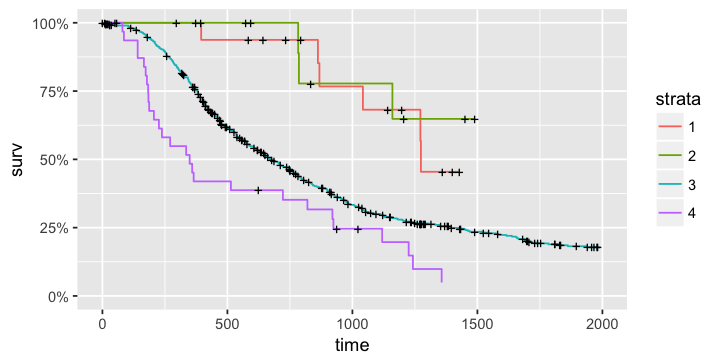

In [18]:
# T stage 그래프
library(ggplot2)
library(ggfortify)

options(repr.plot.width=6, repr.plot.height=3)
surv_by_T.7 <- survfit(cens.OS~ T.7, data = surv_df)
autoplot(surv_by_T.7, conf.int = FALSE) + xlim(0,2000)


In [19]:
# pairwise 분석 = 생존률 차이를 확인하는 분석
library(survminer)
pairwise_survdiff(cens.OS~ T.7, data = surv_df)

Loading required package: ggpubr
Loading required package: magrittr



	Pairwise comparisons using Log-Rank test 

data:  surv_df and T.7 

  1      2      3     
2 0.8275 -      -     
3 0.0122 0.0221 -     
4 0.0008 0.0038 0.0122

P value adjustment method: BH 

### AJCC 8 에 따른 분석

Warning message:
“Removed 46 rows containing missing values (geom_path).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

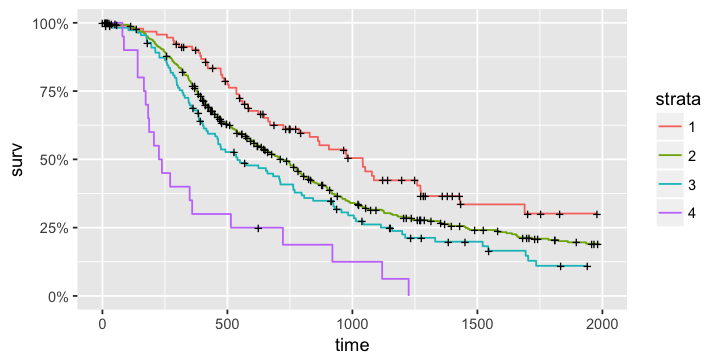

In [20]:
# 그래프
options(repr.plot.width=6, repr.plot.height=3)
surv_by_T.8 <- survfit(cens.OS~ T.8, data = surv_df)
autoplot(surv_by_T.8, conf.int = F) + xlim(0,2000)

In [21]:
# 수치분석 
pairwise_survdiff(cens.OS~ T.8, data = surv_df)


	Pairwise comparisons using Log-Rank test 

data:  surv_df and T.8 

  1       2       3      
2 0.00455 -       -      
3 0.00038 0.06320 -      
4 5.7e-08 4.8e-06 0.00097

P value adjustment method: BH 

## N stage 분석 

### AJCC 7 에 따른 분석

Warning message:
“Removed 45 rows containing missing values (geom_path).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

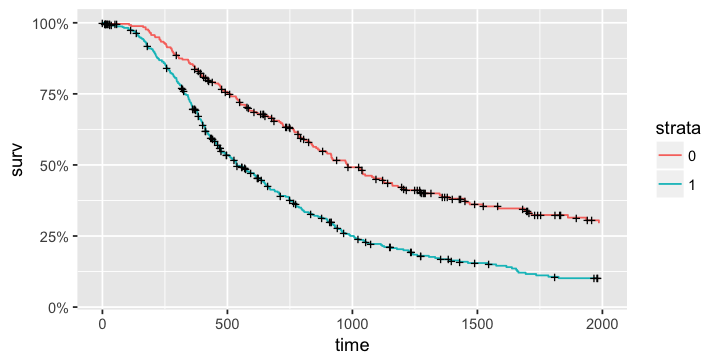

In [22]:
# N stage 그래프
options(repr.plot.width=6, repr.plot.height=3)
surv_by_N.7 <- survfit(cens.OS~ N.7, data = surv_df)
autoplot(surv_by_N.7, conf.int = F) + xlim(0,2000)


In [23]:
# pairwise 분석 = 생존률 차이를 확인하는 분석
library(survminer)
pairwise_survdiff(cens.OS~ N.7, data = surv_df)


	Pairwise comparisons using Log-Rank test 

data:  surv_df and N.7 

  0      
1 7.7e-12

P value adjustment method: BH 

### AJCC 8 에 따른 분석

Warning message:
“Removed 45 rows containing missing values (geom_path).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

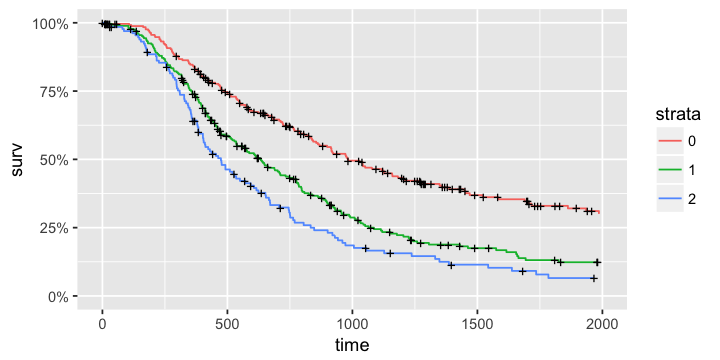

In [24]:
# 그래프
options(repr.plot.width=6, repr.plot.height=3)
surv_by_N.8 <- survfit(cens.OS~ N.8, data = surv_df)
autoplot(surv_by_N.8, conf.int = F) + xlim(0,2000)

In [25]:
# 수치분석 
pairwise_survdiff(cens.OS~ N.8, data = surv_df)


	Pairwise comparisons using Log-Rank test 

data:  surv_df and N.8 

  0       1    
1 9.6e-08 -    
2 4.7e-11 0.022

P value adjustment method: BH 

## 전체 Stage 분석

### AJCC 7 에 따른 분석

Warning message:
“Removed 46 rows containing missing values (geom_path).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

[1] "Stage decription"
[1] "1. Ia 2. Ib 3. IIA 4. IIB 5. III 6. IV"


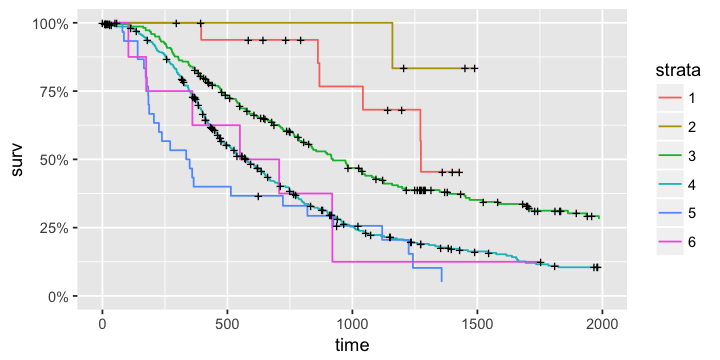

In [26]:
# Stage 그래프
options(repr.plot.width=6, repr.plot.height=3)
surv_by_Stage.7 <- survfit(cens.OS~ Stage.7, data = surv_df)
autoplot(surv_by_Stage.7, conf.int = FALSE) + xlim(0,2000)
print("Stage decription")
print(stage_description)

In [27]:
# pairwise 분석 = 생존률 차이를 확인하는 분석
library(survminer)
pairwise_survdiff(cens.OS~ Stage.7, data = surv_df)


	Pairwise comparisons using Log-Rank test 

data:  surv_df and Stage.7 

  1       2       3       4       5      
2 0.36206 -       -       -       -      
3 0.12108 0.16140 -       -       -      
4 0.00287 0.01333 1.4e-07 -       -      
5 0.00064 0.00853 0.00013 0.14296 -      
6 0.01219 0.00853 0.12108 0.85840 0.76578

P value adjustment method: BH 

### AJCC 8 에 따른 분석

Warning message:
“Removed 46 rows containing missing values (geom_path).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

[1] "Stage decription"
[1] "1. Ia 2. Ib 3. IIA 4. IIB 5. III 6. IV"


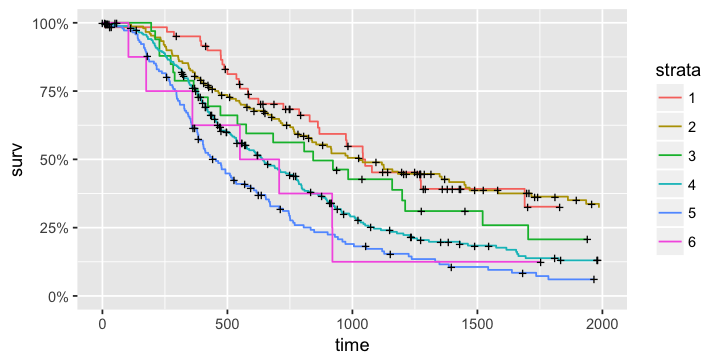

In [28]:
# 그래프
options(repr.plot.width=6, repr.plot.height=3)
surv_by_Stage.8 <- survfit(cens.OS~ Stage.8, data = surv_df)
autoplot(surv_by_Stage.8, conf.int = FALSE) + xlim(0,2000)
print("Stage decription")
print(stage_description)

In [29]:
# 수치분석 
pairwise_survdiff(cens.OS~ Stage.8, data = surv_df)


	Pairwise comparisons using Log-Rank test 

data:  surv_df and Stage.8 

  1       2       3       4       5      
2 0.62096 -       -       -       -      
3 0.20042 0.32998 -       -       -      
4 0.00053 4.5e-05 0.26760 -       -      
5 6.9e-07 2.1e-09 0.02093 0.00849 -      
6 0.06247 0.10292 0.32998 0.68061 0.68061

P value adjustment method: BH 

# Site 별 생존 분석 

Warning message:
“Removed 45 rows containing missing values (geom_path).”Warning message:
“Removed 29 rows containing missing values (geom_point).”

Site Description:  1 = (U or H) , 2 = (B or T)

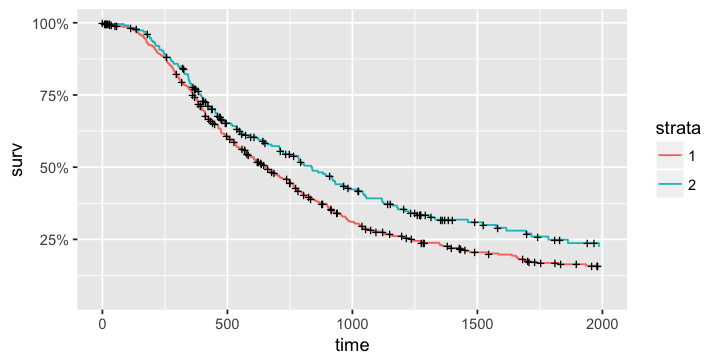

In [30]:
# 그래프
options(repr.plot.width=6, repr.plot.height=3)
surv_by_Site <- survfit(cens.OS~ Site, data = surv_df)
autoplot(surv_by_Site, conf.int = FALSE) + xlim(0,2000)
cat("Site Description: ", site_description)

In [31]:
# 수치분석 
pairwise_survdiff(cens.OS~ Site, data = surv_df)


	Pairwise comparisons using Log-Rank test 

data:  surv_df and Site 

  1    
2 0.027

P value adjustment method: BH 